## Content


- Building a Decision Tree (Intuiton)
    - Weighted entropy
    - Information Gain
    - Code walkthrough



- Gini impurity
    - issue with Entropy
    - Comparing Gini impurity with Entropy
    - Code walkthrough

- Code for Decision Tree - sklearn






#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

Preprocessed Data

In [2]:
!gdown 12G_J8gBel8MpspdXJruZuuMvyrm9upNb
!gdown 1-zjfYbZm8JC4wog9tG4zltMPuZM6p9_A


!gdown 1p03Ltdto8XoOdu14YlcQjzE-360SyI89
!gdown 1mNcWfaEW19ql8WCih6HiqRryCcjFUUqx


Downloading...
From: https://drive.google.com/uc?id=12G_J8gBel8MpspdXJruZuuMvyrm9upNb
To: /content/X_test.csv
100% 51.7k/51.7k [00:00<00:00, 56.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-zjfYbZm8JC4wog9tG4zltMPuZM6p9_A
To: /content/X_train.csv
100% 154k/154k [00:00<00:00, 60.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1p03Ltdto8XoOdu14YlcQjzE-360SyI89
To: /content/y_test.csv
100% 743/743 [00:00<00:00, 1.26MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mNcWfaEW19ql8WCih6HiqRryCcjFUUqx
To: /content/y_train.csv
100% 2.21k/2.21k [00:00<00:00, 2.61MB/s]


In [3]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [4]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({'Target': 1})


In [ ]:
X_sm.shape

(1848, 36)

In [ ]:
X_sm

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,36,1174,3,4,0.233871,1,0,99,3,2,...,1,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
1,21,546,5,1,0.127479,3,1,97,3,1,...,2,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
2,43,422,1,3,0.151584,4,0,33,3,2,...,2,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
3,42,188,29,3,0.127479,2,1,56,1,2,...,0,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
4,35,992,1,3,0.127479,4,1,68,2,1,...,2,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,42,1245,12,3,0.238984,1,0,52,3,4,...,8,0.0,0.000000,1.000000,0.000000,0.895096,0.104904,0.000000,0.895096,0.104904
1844,47,827,12,3,0.236800,1,0,66,3,4,...,8,0.0,0.000000,1.000000,0.000000,0.512758,0.487242,0.000000,0.512758,0.487242
1845,29,336,14,1,0.137509,3,0,85,3,2,...,7,0.0,0.913267,0.086733,0.000000,1.000000,0.000000,0.000000,0.086733,0.913267
1846,26,1142,17,2,0.236799,3,1,33,2,1,...,1,0.0,0.000000,1.000000,0.000000,0.512576,0.487424,0.512576,0.487424,0.000000


# **Building a DT (intuiton)**

Let's take an example

Consider a dataset of 100 samples

It has 2 attributes (2 categorical)

- Gender (Male, Female)
- Age (Less than 35 , Older than 35)
-Target Variable - Employee Attrition (0 - stays , 1 - churns)

Data distribution :

- Class 0 (stays) -> 60 instances
- Class 1 (churns) -> 40 instances

<img src='https://drive.google.com/uc?id=1a3UgvfaCSLjgjY74fbhdnZ1b2e4087mU'>



Let's first split by Gender and calculate information gain

For calculating information gain for Gender, we first calculate entropy for parent and child.

**H(Parent) = 0.971**

<img src='https://drive.google.com/uc?id=1WD9Dwh8t7rfKcK4YGB8yB-2FUnX0lAaG'>



## **How to combine child entropy?** 

We do so by calculate the **weighted entropy** of child nodes.

Suppose we have n points at root node.
- we split by feature f1 
- After split, left node will have n1 points
- right node will have n2 points
- Assume the entropy are $H(a_1)$ and $H(a_2)$ for left and right child node resp.

Now, weighted entropy is calculated by summation of   entropy of node multiplying with the % of points that ended up in that node.

**Weighted entropy of child for f1 = $n_1/n * H(a_1) + n_2/2 * H(a_2)$**


Similarly, **weighted entropy of child node for f2 =  $p_1/n * H(a_1) + p_2/n * H(a_2) + p_3/n * H(a_3)$**

<br>

<br>


Next,lets get back to our example 
- for the calculation of the entropy of child nodes followed by weighted entropy of child nodes

H(Male) = 0.8631

H(Female) = 0.918

weighted entropy = 0.8796


<img src='https://drive.google.com/uc?id=1FDV5Y333PbbQUEhUvVzuvVa-DEekIYrc'>


After calculating the weighted entropy, we calculate the **Information Gain ($IG$)**

**Information Gain = H(Parent) - weighted entropy of child**

We calculate the information gain for each feature and pick the feature with maximum information for split.


Now for our example: 

- Information Gain = Entropy of parent - weighted entropy of child nodes

= 0.971 - 0.8796

IG (Gender)= 0.0914

<img src='https://drive.google.com/uc?id=1sCGtvEybiy2V7qGBmRCRQUPUOPF5rx98'>



Similarly, we calculate the information gain for feature 'Age<35'

H(parent) = 0.971

H(left node) = 0.65

H(right node) = 0.811

weighted entropy of child nodes = 0.714

Information Gain (Age < 35) = 0.257

<img src='https://drive.google.com/uc?id=16Dw6fdvl-i5muTspUS_fD7YygARSVhFb'>



<img src='https://drive.google.com/uc?id=1WnT8s1jDTsQ4AA2K-ca5LJINuPts2aet'>


<img src='https://drive.google.com/uc?id=1HV9u9BGp3G-v3beKxZI-QfbzIuC7Fnqy'>



Now,

IG(Y, Gender) = 0.0914

IG(Y, Age< 35) = 0.257

Since, Information Gain for Age< 35 is more than IG(Gender), hence we will pick Age< 35 for split.

Suppose instead of 2 features, we had n features.
- In that case, we would find information gain for each feature
- Pick the feature with max. info gain to split with
- Again, for the splitted nodes, we would calculate information gain for features
- We'll pick the feature with max info gain to split
- This process will continue till we get pure nodes.... i.e. Entropy = 0

The **key lesson here** is

- At every node of the decision tree
    - we have to try every featutre and possible split to pick the best decision to split on
- **The best criteria is based on Information Gain, decision which has maximum information**

<img src='https://drive.google.com/uc?id=18YOCO8CNB9M6hjv3rPxVJiSqYxGSwMKA'>


## **Code walkthrough**

#### Entropy

In [ ]:
def entropy(y):

    if isinstance(y, pd.Series):
        # calculating probability
        p = y.value_counts()/y.shape[0]
        
        entropy = np.sum(-p*np.log2(p+1e-9)) # adding delta 1e-9 in case p = 0 as log(0) is not defined

        return(entropy)

    else:
        raise('Object must be a Pandas Series.')



#### Weighted entropy for child nodes

In [ ]:
def calculate_weighted_entropy(feature,y):
    categories = feature.unique()

    weighted_entropy = 0

    for category in categories:
        y_category = y[feature == category]
        entropy_category = entropy(y_category)
        # print(category)
        # print(entropy_category)
        weighted_entropy += y_category.shape[0]/y.shape[0]*entropy_category

    
    return weighted_entropy



#### Information gain

In [ ]:
def information_gain(feature,y):
    parent_entropy = entropy(y)

    child_entropy = calculate_weighted_entropy(feature,y)

    ig = parent_entropy - child_entropy

    return ig

In [ ]:
!gdown  1l53Fgkg1G1ekCxxgaDQ00EXrnSMTeJj-

Downloading...
From: https://drive.google.com/uc?id=1l53Fgkg1G1ekCxxgaDQ00EXrnSMTeJj-
To: /content/sample_data.csv
100% 32.5k/32.5k [00:00<00:00, 38.1MB/s]


In [ ]:
sample_data = pd.read_csv('sample_data.csv')

In [ ]:
sample_data

,Gender,Age_less_35,JobRole,Attrition
0,Male,True,Laboratory Technician,0
1,Male,False,Sales Executive,1
2,Male,True,Sales Representative,1
3,Female,False,Healthcare Representative,0
4,Male,True,Sales Executive,0
...,...,...,...,...
995,Male,False,Laboratory Technician,1
996,Female,False,Manufacturing Director,0
997,Female,True,Sales Executive,0
998,Male,False,Manager,0


In [ ]:
sample_data.Attrition.value_counts()

0    831
1    169
Name: Attrition, dtype: int64

#### Entropy at root node

In [ ]:
entropy(sample_data.Attrition)

0.6554120789588516

#### Weighted entropy of child for Gender

In [ ]:
calculate_weighted_entropy(sample_data.Gender, sample_data.Attrition)

0.6554087812684072

#### Information Gain for Gender

In [ ]:
information_gain(sample_data.Gender,sample_data.Attrition)

3.2976904443815513e-06

#### Comparing Information gain for features

In [ ]:
for feature in sample_data.columns[:-1]:
    print(f'Information Gain for feature {feature} is {information_gain(sample_data[feature],sample_data.Attrition)}')

Information Gain for feature Gender is 3.2976904443815513e-06
Information Gain for feature Age_less_35 is 0.021463064919737374
Information Gain for feature JobRole is 0.05429906805101914


# **Gini - Impurity / Gini Index**

#### **Issue with Entropy**

Entropy is defined as $H(Y) = - ∑_{i=1}^k p(y_i)log(p(y_i))$

Issue with Entropy is that we have to take log of probability.
- log is computationally expensive 
- We have to calculate entropy for each feature at each node
- This becomes time consuming.

#### How to resolve this issue?

We introduce **Gini Impurity** to fix this issue

Gini impurity is also a measure like entropy which is used to measure purity

Let **GI** be **gini impurity**
* Gini Impurity of random variable Y is given by 
 * GI(Y) = $1-∑_{i=1}^k(p(y_i)^2)$
 * For a binary classification:
   * GI(y) = $1-[(p(y_i=1))^2+(p(y_i=0))^2]$




<img src='https://drive.google.com/uc?id=18K19yOplDDUg3K-LGH6X16h_atSOgrbE'>



<img src='https://drive.google.com/uc?id=1wxHEHlGsH9K8q9G75csdSWr1DUtkM4mJ'>



### How Gini-Impurity compares with entropy?

Let's see how Gini impurity behaves under various conditions

#### Case 1:

 let p($y_+$) be 0.5 and  p($y_-$) be 0.5
- Here the entropy will be high
    - Entropy = 1

#### What will be Gini impurity in this case?

- GI = 1 - (0.25 + 0.25) = 0.5


<img src='https://drive.google.com/uc?id=1t-MX5z2kAdvqA0hMOcgZlI3DNm8k1P5h'>


#### Case 2

let p($y_+$) be 1 and  p($y_-$) be 0

#### Question: What will be entropy in this case?
Ans: Entropy will be 0

#### What will be Gini Impurity? 
* GI(Y) = 1 - (1 + 0) = 0




<img src='https://drive.google.com/uc?id=1ugbQnYUnB_ROmyK3ykYjKMeFPzVSIIZ_'>


From the above two examples we can see that
-  Gini-Impurity is high when entropy is high
- it is low when the entropy is low

Let's plot the graph of Entropy as well as Gini Impurity:

Notice that, 

1. When the **nodes are pure** i.e for
    - if p($y_+$) = 1 and p($y_-$) = 0, or
    - if p($y_+$) = 0 and p($y_-$) = 1

**the Entropy and Gini-Impurity are zero**

2. when the **probability of p($y_+) =\frac{1}{2}$ and p($y_-)=\frac{1}{2}$**
    -  **the entropy and Gini- Impurity are maximum**

* So, we can conclude that Gini-Impurity has same behaviour as entropy.
  


<img src='https://drive.google.com/uc?id=1ei3q-Wt-Ts9_9BEV_FOKJZ1rqH68X3ck'>


### **Question: How do we calculate Information Gain using Gini Impurity?** 

* We can get Information gain by using Gini-Impurity also,
 
**Information Gain = GI(Gini Impurity) of parent node - Weighted GI of the child nodes**

### Code Walkthrough

#### Gini Impurity

In [ ]:
def gini_impurity(y):
    
  if isinstance(y, pd.Series):
    p = y.value_counts()/y.shape[0]
    gini = 1-np.sum(p**2)
    return gini

  else:
    raise('Object must be a Pandas Series.')

In [ ]:
gini_impurity(sample_data.Attrition)

0.28087799999999996

#### Weighted Gini impurity for child node

In [ ]:
def calculate_weighted_gini(feature, y):
    categories = feature.unique()

    weighted_gini_impurity = 0

    for category in categories:
        y_category = y[feature == category]
        gini_impurity_category = gini_impurity(y_category)
        # print(category)
        # print(gini_impurity_category)
        weighted_gini_impurity += y_category.shape[0]/y.shape[0]*gini_impurity_category

    
    return weighted_gini_impurity

In [ ]:
calculate_weighted_gini(sample_data.Age_less_35, sample_data.Attrition)

0.2724771918985819

#### Information Gain

In [ ]:
def information_gain(feature,y):
    parent_gini = gini_impurity(y)

    child_gini = calculate_weighted_gini(feature,y)

    ig = parent_gini - child_gini

    return ig

In [ ]:
information_gain(sample_data.Age_less_35, sample_data.Attrition)

0.008400808101418078

In [ ]:
for feature in sample_data.columns[:-1]:
    print(f'Information Gain for feature {feature} is {information_gain(sample_data[feature],sample_data.Attrition)}')

Information Gain for feature Gender is 1.2832567979348397e-06
Information Gain for feature Age_less_35 is 0.008400808101418078
Information Gain for feature JobRole is 0.020654039636781696


# **Code for Decision Tree - sklearn**




Now, let's try to classify our data using Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)

In [ ]:
# Train on training data
tree_clf.fit(X_sm,y_sm)

# predict on test data
tree_clf.score(X_test,y_test)

0.7635869565217391

#### How can we define the performance of our model?

- **Classification Accuracy**:\
Number of correct predictions made out of all predictions made.

#### But is using accuracy enough ?
  - We made our **dataset balanced** using oversampling
  - There is no preference for any class
  - This implies, accuracy in itself is enough for estimating model's performance

We will also be using k-fold CV for training our model

Recall the benefits of using CV



In [ ]:
from sklearn.model_selection import KFold, cross_validate

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(tree_clf, X_sm, y_sm, cv = kfold, scoring = 'accuracy', return_train_score = True)

print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
print(f"K-Fold Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")

K-Fold Accuracy Mean: Train: 100.0 Validation: 83.6680376028202
K-Fold Accuracy Std: Train: 0.0 Validation: 7.9089676612890765


#### What can we say from this info ?

- There's a big difference in accuracy of training data and val data
- So, **model is clearly overfitting the data**

#### But why is this happening ?
  - To understand this lets understand when does Decision Tree overfit/underfit

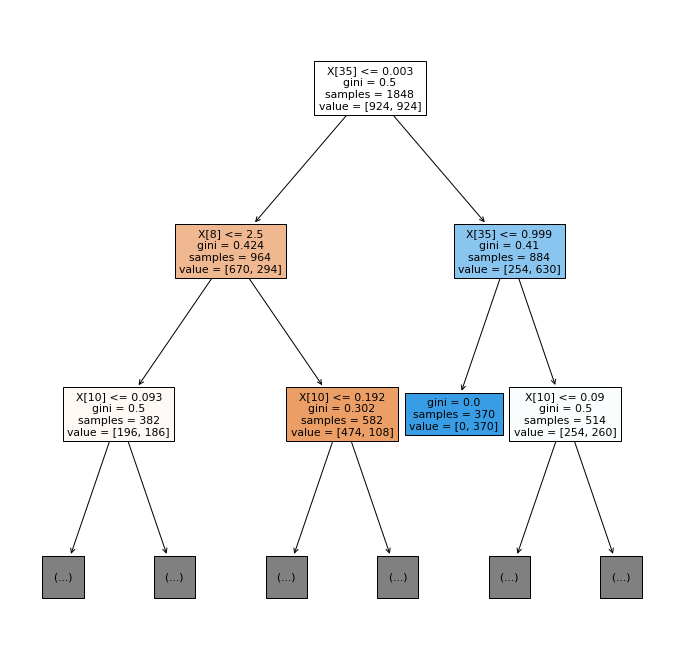

In [ ]:
from sklearn.tree import plot_tree

#plotting till depth of Tree = 2
plt.figure(figsize=(12,12))
plot_tree(tree_clf,max_depth = 2, filled=True);

#**Stopping Criteria**

#### **Question: What should be the stopping criteria to prevent the growth of a Decision Tree?**

Ans: there are three major criteria for preventing growth of Decision Tree

1. Number of datapoints in the node is less than some pre-specified limit
    - e.g if a particular node has datapoints less than 20


2. Purity of the node is more than some pre-specified limit. 

3. Depth of the node is more than some pre-specified limit.

